## Dataset and Problem Introduction

In this analysis, we explore the correlation between the earnings of individuals and their college major. Specifically, we would like to know if earnings change with different majors.

Data Source: https://www.census.gov/programs-surveys/acs/microdata.html
<br>Reference: https://dataquest.io/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('datasets/recent-grads.csv')
print(recent_grads.iloc[0])     # inspecting the first row of the data set to get an idea of columns involved

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


## Data Dictionary

| Column Name      | Description |
| ----------- | ----------- |
| Rank | Ranked in ascending order of the Median earning |
| Major_code | Code corresponding to each College Major |
| Major | Name of the College Major |
| Total | Total Number of people with a major |
| Men | Number of Men enrolled for a major |
| Women | Number of Women enrolled for a major |
| Major_category | Category under which the major falls |
| ShareWomen | Percentage of Women in a Major |
| Sample_size | Sample size of the data |
| Employed | Total number of people employed |
| Full_time | Number of people who are employed full time, i.e. working 35 hours or more per week |
| Part_time | Number of people who are employed part time, i.e. working less than 35 hours per week |
| Full_time_year_round | Number of people who are Employed at least 50 weeks in a year for more than 35 hours per week |
| Unemployed | Total number of people who are unemployed |
| Unemployment_rate | Fraction obtained by calculating Unemployed / (Unemployed + Employed) |
| Median | Median value of earnings of full-time, year-round workers |
| P25th | 25th percentile of earnings of full-time, year-round workers |
| P75th | 75th percentile of earnings of full-time, year-round workers |
| College_jobs | Number of Jobs that require a college degree |
| Non_college_jobs | Number of Jobs that don't require a college degree |
| Low_wage_jobs | Number of Low wage jobs |

In [2]:
recent_grads.head()  # Printing the first 5 rows

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()    # Printing the last 5 rows

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


## Initial Inferences

The dataset shows the ranking of various college majors based on their median earnings values. The dataset is ordered in descending order of median earning.

* Looking at the first row we can see that Petroleum Engineering, a major that falls under the engineering discipline has the highest median earning among all other majors listed. We can see the percentage of women is only 12% for this major.
* Looking at the percentage of women in the high paying majors, except for the 5th ranked major, chemical engineering, the percentage is below 15%. The percentage of women in the high paying majors are lower, it seems from the initial observation.
* Looking at the lowest paying majors, it looks like the percentage of women are quite high (the last major reaches 88%).

In [4]:
recent_grads.describe()    # To print descriptive statistics of the dataset

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Removing missing data 

In [5]:
recent_grads=recent_grads.dropna()
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  172 non-null    int64  
 1   Major_code            172 non-null    int64  
 2   Major                 172 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        172 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           172 non-null    int64  
 9   Employed              172 non-null    int64  
 10  Full_time             172 non-null    int64  
 11  Part_time             172 non-null    int64  
 12  Full_time_year_round  172 non-null    int64  
 13  Unemployed            172 non-null    int64  
 14  Unemployment_rate     172 non-null    float64
 15  Median                1

## Major v/s (Un)Employment

We have a `Total` column in our dataset which represents the total number of students enrolled for a certain major.Therefore, the major with highest value for total is the most popular major. 

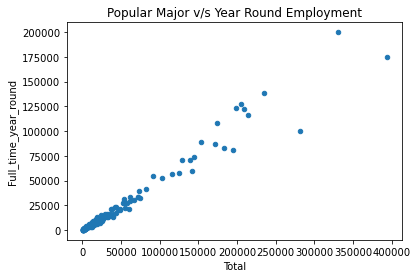

In [6]:
#Scatter Plot to find the correlation between Popular Major (Total) and All Year Round Employment(Full_time_year_round)

a1=recent_grads.plot('Total', 'Full_time_year_round', kind='scatter',title="Popular Major v/s Year Round Employment")

It appears that there is a strong correlations and an almost linear relationship. As the popularity of major increases (as the total number of students in a certain major increases) the number of students who got full time jobs year round also increased (with a few exceptions). 

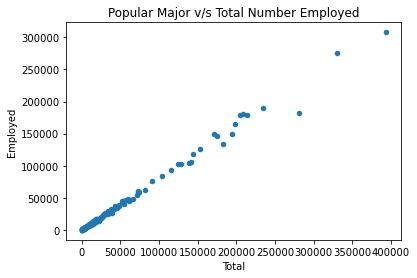

In [7]:
a2=recent_grads.plot('Total', 'Employed', kind='scatter', title="Popular Major v/s Total Number Employed")

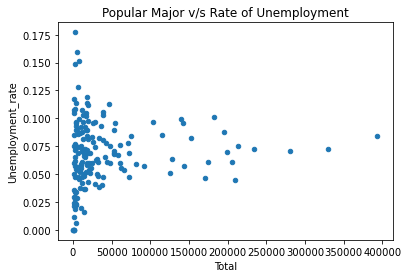

In [8]:
a3=recent_grads.plot('Total', 'Unemployment_rate', kind='scatter', title="Popular Major v/s Rate of Unemployment")

It appears there is also strong correlation between most popular major and getting employed, while the correlation is not as strong for popular major and unemployment. However, we can clearly see that for less popular majors, the unemployment rate is quite concentrated, some are very high, but the majority of them are in the middle. So, this potentially explains why these majors are taken up by less people. 

## Major v/s Earnings

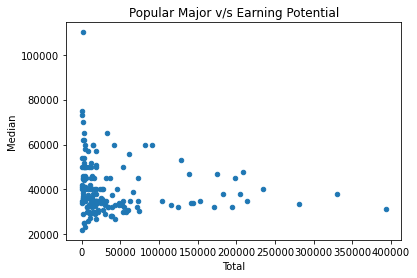

In [9]:
a4=recent_grads.plot('Total', 'Median', kind='scatter', title="Popular Major v/s Earning Potential")

It appears that the least popular majors have more income potential. 
This could mean a few things: 
* The least popular majors can be hard to get into or very specialised majors that offer great earning potential.
* The most popular jobs offer better employment, at the same time due to oversaturation the earning potential is less for such majors.
* The sample size is too small to make any predictions.

<AxesSubplot:title={'center':'Sample Size v/s Earning Potential'}, xlabel='Sample_size', ylabel='Median'>

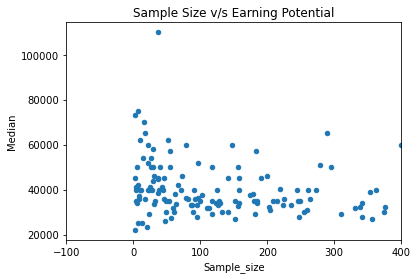

In [10]:
recent_grads.plot('Sample_size','Median', kind='scatter',title="Sample Size v/s Earning Potential", xlim=(-100,400))

There doesn't appear to be much of a relationship between sample size and earning median. But we can see that if the sample size is small, there are more higher values. This could be due to the lack of sample data. 

In [11]:
recent_grads[['Major','Total', 'Sample_size', 'Median']].sort_values('Total').head(10)

,Major,Total,Sample_size,Median
73,MILITARY TECHNOLOGIES,124.0,4,40000
52,MATHEMATICS AND COMPUTER SCIENCE,609.0,7,42000
112,SOIL SCIENCE,685.0,4,35000
33,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,5,50000
1,MINING AND MINERAL ENGINEERING,756.0,7,75000
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,5,34000
55,SCHOOL STUDENT COUNSELING,818.0,4,41000
2,METALLURGICAL ENGINEERING,856.0,3,73000
172,LIBRARY SCIENCE,1098.0,2,22000
19,COURT REPORTING,1148.0,14,54000


This table is created in ascending order of Popularity (or total number of students). 

The table tells us that popularity doesn't have much to do with earnings because the 5th least popular major according to the data earns the most and the 8th least popular major earns the 2nd highest. At the same time, the 9th least major earns the lowest amount. 

However, the sample size is very small so it's difficult to make inferences. 

In [12]:
recent_grads[['Major','Total', 'Sample_size', 'Median']].sort_values('Total', ascending=False).head(10)

,Major,Total,Sample_size,Median
145,PSYCHOLOGY,393735.0,2584,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,4212,38000
123,BIOLOGY,280709.0,1370,33400
57,GENERAL BUSINESS,234590.0,2380,40000
93,COMMUNICATIONS,213996.0,2394,35000
34,NURSING,209394.0,2554,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,2684,38000
40,ACCOUNTING,198633.0,2042,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,1436,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,1387,38000


This table shows the majors with the highest number of people enrolled. 

Psychology appears to be the most popular major but clearly it is not the highest earner. In fact, out of the top 10 popular majors, the first 30 highest earning majors are not present. So, with good certainty we can say that popularity of the majors and earnings potential don't have a strong correlation.

# Gender Bias and Earnings

<AxesSubplot:title={'center':'Women Percentage v/s Earning Potential'}, xlabel='ShareWomen', ylabel='Median'>

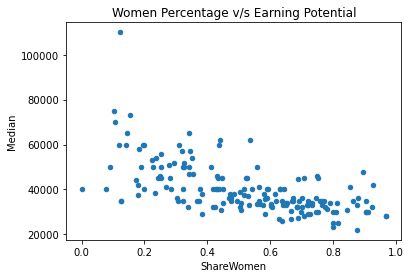

In [13]:
recent_grads.plot('ShareWomen','Median', kind='scatter',title="Women Percentage v/s Earning Potential")

There is a weak correlation between the percentage of women and their earnings potential. As the percentage of women increased in a certain major, the earnings potential gradually decreased. Therefore, the majors with a majority of women tend to get paid less and the opposite also seems true. The subjects where men are a majority tend to get paid more.

In [14]:
recent_grads[['Major','Men','Women', 'Sample_size', 'Median', 'ShareWomen']].sort_values('ShareWomen').head(10)

,Major,Men,Women,Sample_size,Median,ShareWomen
73,MILITARY TECHNOLOGIES,124.0,0.0,4,40000,0.000000
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,4419.0,371.0,71,40000,0.077453
26,CONSTRUCTION SERVICES,16820.0,1678.0,295,50000,0.090713
1,MINING AND MINERAL ENGINEERING,679.0,77.0,7,75000,0.101852
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1123.0,135.0,16,70000,0.107313
8,MECHANICAL ENGINEERING,80320.0,10907.0,1029,60000,0.119559
0,PETROLEUM ENGINEERING,2057.0,282.0,36,110000,0.120564
106,TRANSPORTATION SCIENCES AND TECHNOLOGIES,13257.0,1893.0,180,35000,0.124950
111,FORESTRY,3156.0,451.0,48,35000,0.125035
11,AEROSPACE ENGINEERING,12953.0,2105.0,147,60000,0.139793


In [15]:
recent_grads[['Major','Men','Women', 'Sample_size', 'Median', 'ShareWomen']].sort_values('ShareWomen', ascending=False).head(10)

,Major,Men,Women,Sample_size,Median,ShareWomen
164,EARLY CHILDHOOD EDUCATION,1167.0,36422.0,342,28000,0.968954
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,1225.0,37054.0,95,28000,0.967998
51,MEDICAL ASSISTING SERVICES,803.0,10320.0,67,42000,0.927807
138,ELEMENTARY EDUCATION,13029.0,157833.0,1629,32000,0.923745
150,FAMILY AND CONSUMER SCIENCES,5166.0,52835.0,518,30000,0.910933
100,SPECIAL NEEDS EDUCATION,2682.0,26057.0,246,35000,0.906677
156,HUMAN SERVICES AND COMMUNITY ORGANIZATION,885.0,8489.0,89,30000,0.905590
151,SOCIAL WORK,5137.0,48415.0,374,30000,0.904075
34,NURSING,21773.0,187621.0,2554,48000,0.896019
88,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,1589.0,11797.0,81,36000,0.881294


For the top 5 high paying jobs, the women participation is less than 15 percentage. The majors where women share is more than 90% (except for one major) are all in the last 72 rankings in terms of earnings potential.

## Full Time Employment and Earnings

<AxesSubplot:title={'center':'Full Time Year Round Employment v/s Earning Potential'}, xlabel='Full_time_year_round', ylabel='Median'>

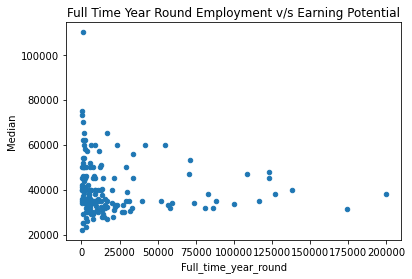

In [16]:
recent_grads.plot('Full_time_year_round', 'Median', kind='scatter',title="Full Time Year Round Employment v/s Earning Potential")

<AxesSubplot:title={'center':'Full Time v/s Earning Potential'}, xlabel='Full_time', ylabel='Median'>

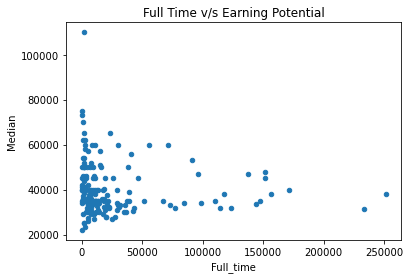

In [17]:
 recent_grads.plot('Full_time', 'Median', kind='scatter', title="Full Time v/s Earning Potential")

<AxesSubplot:title={'center':'Part Time v/s Earning Potential'}, xlabel='Part_time', ylabel='Median'>

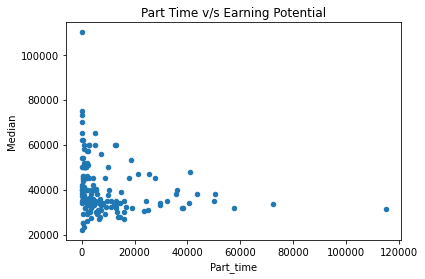

In [18]:
recent_grads.plot('Part_time', 'Median', kind='scatter', title="Part Time v/s Earning Potential")

It looks like there is no relationship between Full time year round, full time, and part time employment against earnings potential from the given data.

## Normalising full & part time jobs

To further the analysis, we can find the percentage of the number of people in full time and part time jobs. To do this we find the fraction of these groups out of the total number of people in a major. 

<AxesSubplot:title={'center':'Full Time Year Round Employment Percantage v/s Earning Potential'}, xlabel='fullyear_round_percentage', ylabel='Median'>

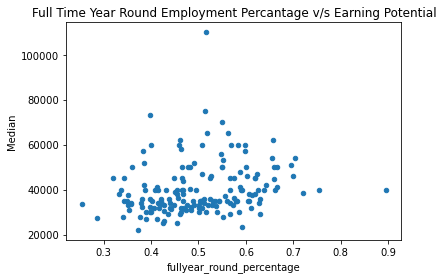

In [19]:
# Finding the fraction out of Total

fullyear_round_percentage = recent_grads['Full_time_year_round']/recent_grads['Total']
fulltime_percentage = recent_grads['Full_time']/recent_grads['Total']
parttime_percentage = recent_grads['Part_time']/recent_grads['Total']


# Adding it to the dataframe

recent_grads['fullyear_round_percentage']=fullyear_round_percentage
recent_grads['fulltime_percentage']=fulltime_percentage
recent_grads['Parttime_percentage']=parttime_percentage


recent_grads.plot('fullyear_round_percentage', 'Median', kind='scatter', title="Full Time Year Round Employment Percantage v/s Earning Potential")

<AxesSubplot:title={'center':'Full Time Percentage v/s Earning Potential'}, xlabel='fulltime_percentage', ylabel='Median'>

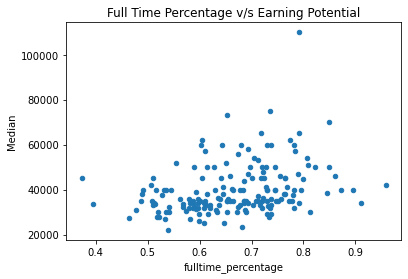

In [20]:
recent_grads.plot('fulltime_percentage', 'Median', kind='scatter', title="Full Time Percentage v/s Earning Potential")

<AxesSubplot:title={'center':'Part Time Percentage v/s Earning Potential'}, xlabel='Parttime_percentage', ylabel='Median'>

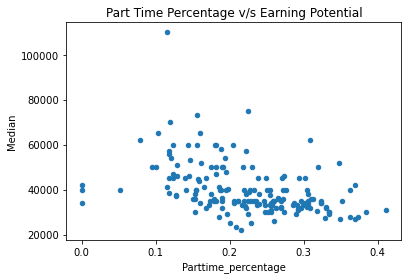

In [21]:
recent_grads.plot('Parttime_percentage', 'Median', kind='scatter', title="Part Time Percentage v/s Earning Potential")

In these plots we can see a very weak relationship between the working percentages and the earnings potential. 

For the case of full time jobs, as the percentage increased, the earnings potential also increased slightly. But for part time jobs, the earnings potential decreased very slightly with the increase in percentage of the number of people in a particular major. Additionally, there are less than 50% of people who are in part time jobs out of the total number of people. 

Therefore, we can say that part time jobs are in less demand and they also don't offer high earnings potential for a majority of people.

Text(0, 0.5, 'Part Time %')

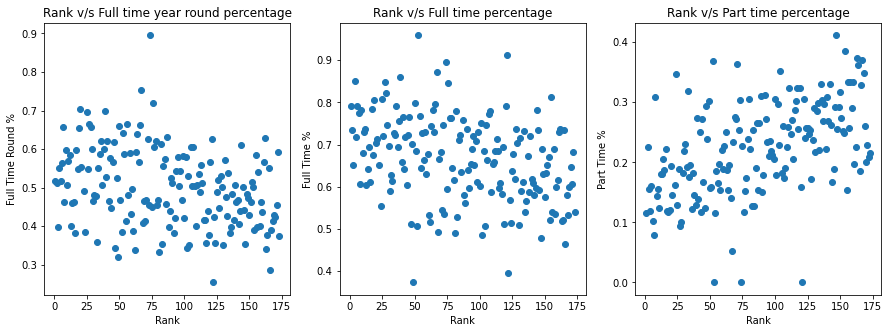

In [22]:
#Creating 3 subplots 

fig=plt.figure(figsize=(15,5))
pl1=fig.add_subplot(1,3,1)
pl2=fig.add_subplot(1,3,2)
pl3=fig.add_subplot(1,3,3)

# Creating 1st plot : Rank v/s Full time year round percentage

pl1.scatter(recent_grads['Rank'], recent_grads['fullyear_round_percentage'])
pl1.set_title('Rank v/s Full time year round percentage')
pl1.set_xlabel('Rank')
pl1.set_ylabel('Full Time Round %')

# Creating 2nd plot : Rank v/s Full time percentage

pl2.scatter(recent_grads['Rank'], recent_grads['fulltime_percentage'])
pl2.set_title('Rank v/s Full time percentage')
pl2.set_xlabel('Rank')
pl2.set_ylabel('Full Time %')

# Creating 3rd plot : Rank v/s Part time  percentage

pl3.scatter(recent_grads['Rank'], recent_grads['Parttime_percentage'])
pl3.set_title('Rank v/s Part time percentage')
pl3.set_xlabel('Rank')
pl3.set_ylabel('Part Time %')

For these plots it's hard to show a relationship. But we can see that the full time percentage slightly decreases with less paying majors while there are more part time jobs available with less paying majors. 

Therefore, high paying majors have more full time job offers, while low paying majors offer more part time jobs.

# College/Non College jobs and influence of income

Text(0, 0.5, 'No. of Low Wage jobs')

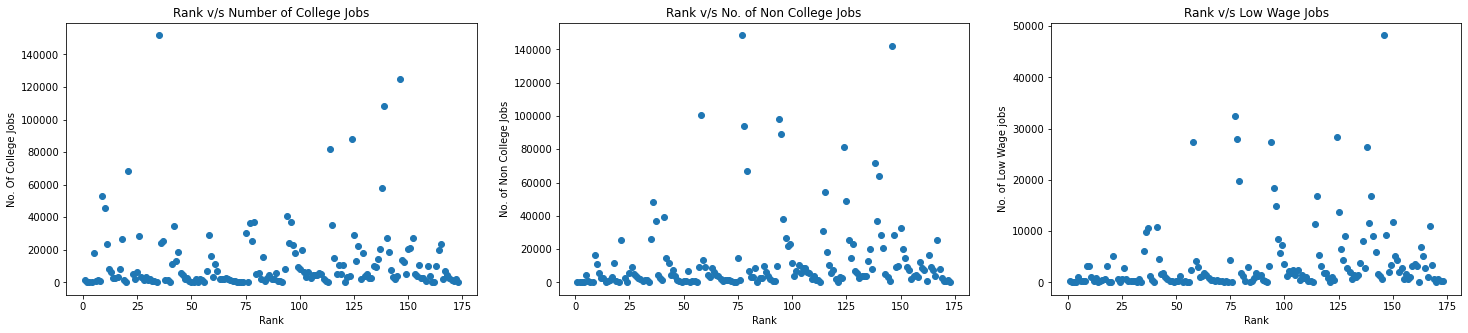

In [23]:
# Creating 3 subplots 

fig=plt.figure(figsize=(25,5))
pl4=fig.add_subplot(1,3,1)
pl5=fig.add_subplot(1,3,2)
pl6=fig.add_subplot(1,3,3)


# Creating plot: Rank v/s Number of College Jobs

pl4.scatter(recent_grads['Rank'], recent_grads['College_jobs'])
pl4.set_title('Rank v/s Number of College Jobs')
pl4.set_xlabel('Rank')
pl4.set_ylabel('No. Of College Jobs')


# Creating plot:Rank v/s No. of Non College Jobs

pl5.scatter(recent_grads['Rank'], recent_grads['Non_college_jobs'])
pl5.set_title('Rank v/s No. of Non College Jobs')
pl5.set_xlabel('Rank')
pl5.set_ylabel('No. of Non College Jobs')


# Creating plot:Rank v/s Low Wage Jobs

pl6.scatter(recent_grads['Rank'], recent_grads['Low_wage_jobs'])
pl6.set_title('Rank v/s Low Wage Jobs')
pl6.set_xlabel('Rank')
pl6.set_ylabel('No. of Low Wage jobs')

It appears that the type of job doesn't have much of a relationship with earnings potential.

## Frequency Analysis

Text(0, 0.5, 'Frequency')

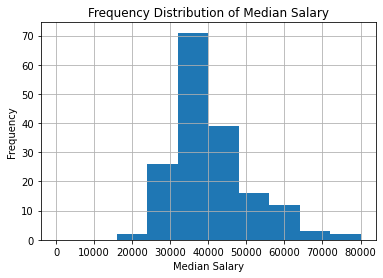

In [24]:
# Checking the frequency distribution of Median Salary

h1=recent_grads['Median'].hist(bins=10, range=(0,80000))
h1.set_title("Frequency Distribution of Median Salary")
h1.set_xlabel("Median Salary")
h1.set_ylabel("Frequency")

The histogram indicates that a majority of people are earning a salary between 30,000 and 40,000.

Text(0, 0.5, 'Frequency')

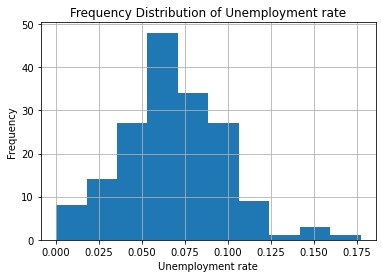

In [25]:
# Checking the frequency distribution of Unemployment

h1=recent_grads['Unemployment_rate'].hist()
h1.set_title("Frequency Distribution of Unemployment rate")
h1.set_xlabel("Unemployment rate")
h1.set_ylabel("Frequency")

The highest unemployment rate for any major is between 5 to 7.5%

Text(0, 0.5, 'Frequency')

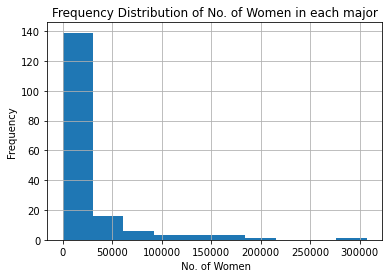

In [26]:
# Checking the frequency distribution of no. of Women 

h1=recent_grads['Women'].hist()
h1.set_title("Frequency Distribution of No. of Women in each major")
h1.set_xlabel(" No. of Women")
h1.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

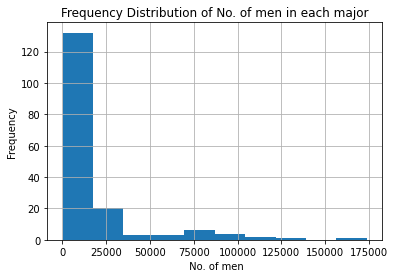

In [27]:
# Checking the frequency distribution of no. of men 

h1=recent_grads['Men'].hist()
h1.set_title("Frequency Distribution of No. of men in each major")
h1.set_xlabel(" No. of men")
h1.set_ylabel("Frequency")

After analysing the men and women, we can see that there is about 10% of the majors dominated by women, and another 10% dominated by men.

Text(0, 0.5, 'Frequency')

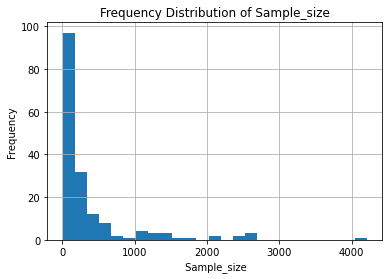

In [28]:
# Checking the frequency distribution of Sample_size

h1=recent_grads['Sample_size'].hist(bins=25)
h1.set_title("Frequency Distribution of Sample_size")
h1.set_xlabel(" Sample_size")
h1.set_ylabel("Frequency")

Here we can see that the sample size is very small for the majority of the data we have. This could be influencing most of our analysis.

## Scatter Matrix

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

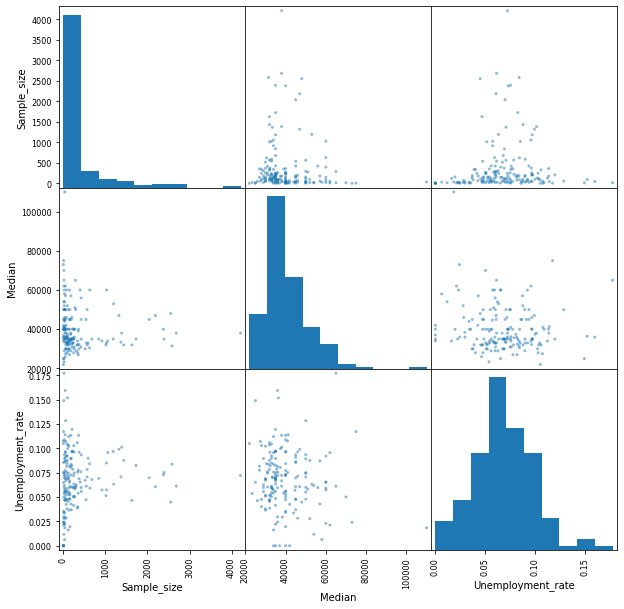

In [29]:
#Importing the scatter matrix from pandas.plotting library

from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10)) 

We can see that when the sample size is smaller, unemployment rate and median of earnings changed from low to high. Since this doesn't show any correlation, we can't clearly find a relationship between the median and unemployment rate. 

array([[<AxesSubplot:xlabel='Total', ylabel='Total'>,
        <AxesSubplot:xlabel='Median', ylabel='Total'>],
       [<AxesSubplot:xlabel='Total', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

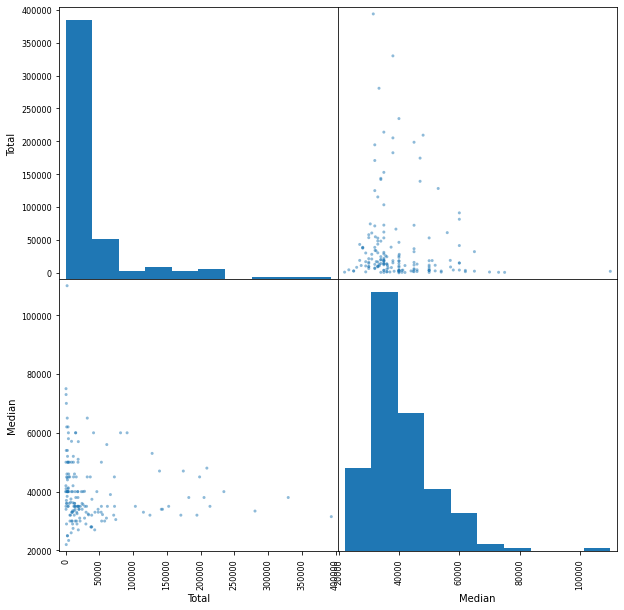

In [30]:
scatter_matrix(recent_grads[['Total','Median']], figsize=(10,10))

Due to the small sample size, it looks like both high paying and low paying jobs are concentrated at the least popular (with the least number of total people enrolled) side.

<AxesSubplot:title={'center':'Share of women in the 10 courses with the highest median salary'}, xlabel='Major'>

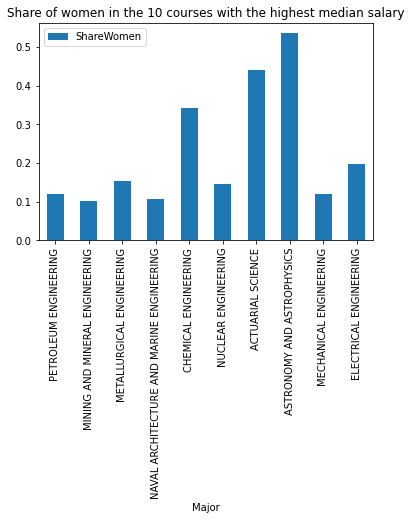

In [31]:
recent_grads[:10].plot.bar(
    x='Major', y='ShareWomen',title='Share of women in the 10 courses with the highest median salary')

<AxesSubplot:title={'center':'Share of women in the 10 courses with the lowest median salary'}, xlabel='Rank'>

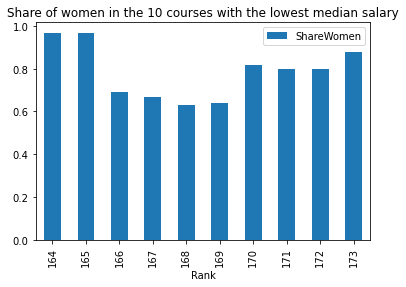

In [32]:
recent_grads.tail(10).plot.bar(
    x='Rank', y='ShareWomen',title='Share of women in the 10 courses with the lowest median salary')

As we saw in our previous observations, the highest paying majors have less female participation, and the lowest paying majors have more female participation.

<AxesSubplot:title={'center':'Unemployment Rate in Top Paying Majors'}, xlabel='Major'>

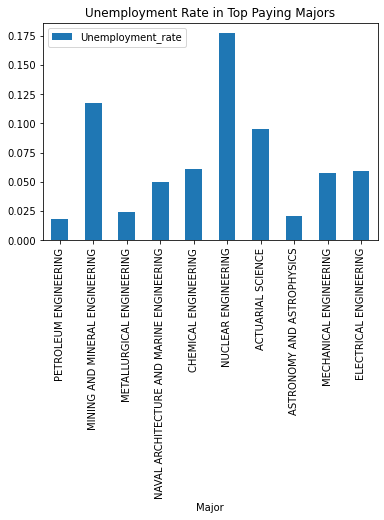

In [33]:
recent_grads.head(10).plot.bar(x='Major', y='Unemployment_rate', title='Unemployment Rate in Top Paying Majors')

<AxesSubplot:title={'center':'Unemployment Rate in Least Paying Majors'}, xlabel='Major'>

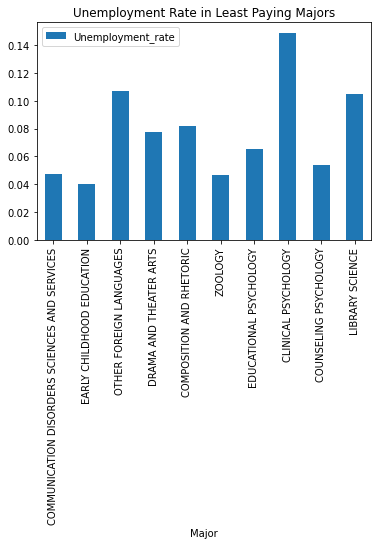

In [34]:
recent_grads.tail(10).plot.bar(x='Major', y='Unemployment_rate', title='Unemployment Rate in Least Paying Majors')

Compared to the highest paying majors, the 10 lowest paying majors have more unemployment on average. However, a smaller sample size of the higher paying majors might have skewed this observation.

<AxesSubplot:title={'center':'Distribution of Men and Women in each Major Categories.'}, xlabel='Major_category'>

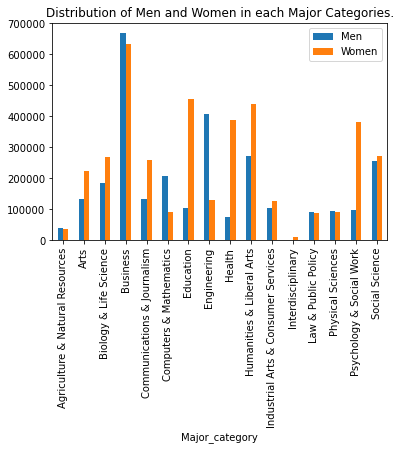

In [35]:
recent_grads.groupby('Major_category').sum().plot.bar(
    y=['Men','Women'], title="Distribution of Men and Women in each Major Categories.")

It appears that business is the most in demand major category with both men and women pursuing it. 

<AxesSubplot:>

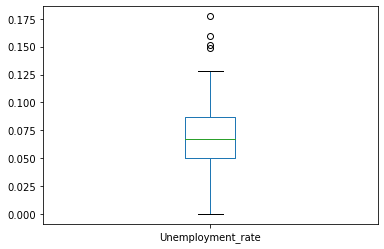

In [36]:
recent_grads['Unemployment_rate'].plot.box()

The median value of unemployment rate is around 7.5% and there are many outliers in the data. These could be exceptional cases or it could be due to the small sample size.

<AxesSubplot:>

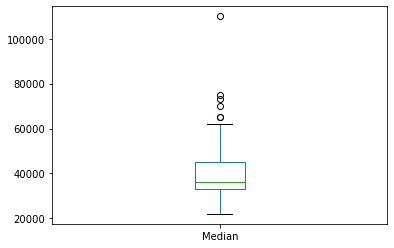

In [37]:
recent_grads['Median'].plot.box()

The median of earnings values is close to $40,000. There are also many outliers in this set. This could be due to very high salaries offered by some specialised majors, or it could be a misrepresentation due to sampling size. 

# Conclusions 

* In the case of top ranked majors, the sample size available was very small which could have adversely affected the analysis. 

* The full time employment rate is higher for more popular majors. It seems that more and more people are opting for popular majors for this reason. 

* Popularity doesn't have much to do with earnings potential. Some of the least popular majors (with low numbers of total people enrolled) are actually high paying majors. These are some of the very highly specialised major as well as hard-to-get-into majors.

* In the case of full time jobs, as the percentage increased, the earnings potential also increased slightly. 

* Part time job are not in demand. They also doesn't offer high earnings potential for a majority of people.

* High paying majors have more full time job offers while low paying majors offer more part time jobs.

* The majority of people are earning a salary between \\$30,000 and \\$40,000.

* The highest paying majors have less female participation while the lowest paying majors have more female participation.

* Business is the most in demand Major category and both men and women are pursuing it.